In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [24]:
macro_data = pd.read_csv('landslidee.csv', parse_dates=['dates'], index_col='dates')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(945, 8)


,stationid,temperature,humidity,pressure,rain,lightavgw/o0,lightmax,moisture
dates,,,,,,,,
2018-08-07,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000,0.0000
2018-09-07,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000,5.6930
2018-10-07,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000,6.8511
2018-11-07,t10,24.29851,87.68657,1036.857463,963.00,8.8358,4000,6.0373
2018-12-07,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333,31.2385


In [25]:
macro_data.drop(['stationid', 'lightavgw/o0','lightmax'], axis = 1)

,temperature,humidity,pressure,rain,moisture
dates,,,,,
2018-08-07,25.46875,82.18750,1036.346875,6.75,0.0000
2018-09-07,26.19298,83.14912,1037.604386,1761.75,5.6930
2018-10-07,25.17021,85.34043,1037.889362,652.50,6.8511
2018-11-07,24.29851,87.68657,1036.857463,963.00,6.0373
2018-12-07,24.06923,87.64615,1027.830769,254.25,31.2385
...,...,...,...,...,...
2018-11-21,16.65926,58.69630,1026.797407,73577.25,54.4222
2018-11-22,15.52482,63.16312,1027.495248,65301.75,54.5674
2018-11-23,15.81560,59.21277,1029.318511,73534.50,54.8794


In [26]:
X_Data = macro_data[['temperature','humidity','pressure','rain','moisture']]

In [27]:
X_Data = X_Data.apply(lambda x: (x - x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)))

In [28]:
X_Data

,temperature,humidity,pressure,rain,moisture
dates,,,,,
2018-08-07,0.750813,0.744870,0.931721,0.000082,0.000000
2018-09-07,0.781369,0.758864,0.933727,0.021475,0.056930
2018-10-07,0.738218,0.790751,0.934181,0.007954,0.068511
2018-11-07,0.701440,0.824892,0.932536,0.011739,0.060373
2018-12-07,0.691767,0.824304,0.918140,0.003099,0.312385
...,...,...,...,...,...
2018-11-21,0.379138,0.403031,0.916492,0.896876,0.544222
2018-11-22,0.331275,0.468031,0.917605,0.796001,0.545674
2018-11-23,0.343543,0.410547,0.920513,0.896355,0.548794


In [29]:
ad_fuller_result_1 = adfuller(X_Data['temperature'].diff()[1:])

print('Temperature')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(X_Data['humidity'].diff()[1:])

print('Humidity')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(X_Data['pressure'].diff()[1:])

print('Vibration')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(X_Data['rain'].diff()[1:])

print('Raindrop')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')

ad_fuller_result_5 = adfuller(X_Data['moisture'].diff()[1:])

print('Moisture')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

Temperature
ADF Statistic: -17.81164133894189
p-value: 3.187445330214896e-30

---------------------

Humidity
ADF Statistic: -12.695739116776748
p-value: 1.1071567491527742e-23

---------------------

Vibration
ADF Statistic: -12.647926000839794
p-value: 1.3885794682258403e-23

---------------------

Raindrop
ADF Statistic: -16.173662942422627
p-value: 4.3384973652255553e-29

---------------------

Moisture
ADF Statistic: -14.832242291885175
p-value: 1.8915153141657414e-27


In [30]:
print('temperature causes humidity?\n')
print('------------------')
granger_1 = grangercausalitytests(X_Data[['humidity', 'temperature']], 4)

print('\n humidity is cause of temperature?\n')
print('------------------')
granger_2 = grangercausalitytests(X_Data[['temperature', 'humidity']], 4)

print('rain is cause of moisture?\n')
print('------------------')
granger_3 = grangercausalitytests(X_Data[['moisture', 'rain']], 4)

print('\n moisture is cause of rain?\n')
print('------------------')
granger_4 = grangercausalitytests(X_Data[['rain', 'moisture']], 4)

print('pressure is cause of moisture?\n')
print('------------------')
granger_5 = grangercausalitytests(X_Data[['moisture', 'pressure']], 4)

print('\n moisture is cause of pressure?\n')
print('------------------')
granger_6 = grangercausalitytests(X_Data[['pressure', 'moisture']], 4)

temperature causes humidity?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.5469 , p=0.0000  , df_denom=941, df_num=1
ssr based chi2 test:   chi2=18.6060 , p=0.0000  , df=1
likelihood ratio test: chi2=18.4250 , p=0.0000  , df=1
parameter F test:         F=18.5469 , p=0.0000  , df_denom=941, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8678  , p=0.0002  , df_denom=938, df_num=2
ssr based chi2 test:   chi2=17.8301 , p=0.0001  , df=2
likelihood ratio test: chi2=17.6636 , p=0.0001  , df=2
parameter F test:         F=8.8678  , p=0.0002  , df_denom=938, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.9622  , p=0.0001  , df_denom=935, df_num=3
ssr based chi2 test:   chi2=21.0430 , p=0.0001  , df=3
likelihood ratio test: chi2=20.8114 , p=0.0001  , df=3
parameter F test:         F=6.9622  , p=0.0001  , df_denom=935, df_num=3

Granger Causality
number of lags (no zero) 4

In [31]:
X_Data = X_Data[['temperature','humidity','pressure','rain','moisture']]
print(macro_data.shape)

(945, 8)


In [36]:
train_df=X_Data[:-20]
test_df=X_Data[-20:]

In [37]:
print(test_df.shape)

(20, 5)


In [38]:
model = VAR(train_df.diff()[1:])

In [39]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -22.64      -22.62   1.468e-10      -22.63
1       -22.88      -22.72   1.159e-10      -22.82
2       -23.02     -22.72*   1.009e-10      -22.91
3       -23.06      -22.64   9.617e-11      -22.90
4       -23.15      -22.59   8.862e-11     -22.93*
5       -23.19      -22.50   8.447e-11      -22.93
6       -23.19      -22.37   8.454e-11      -22.88
7       -23.19      -22.24   8.457e-11      -22.83
8      -23.21*      -22.12  8.332e-11*      -22.79
9       -23.20      -21.97   8.441e-11      -22.73
10      -23.20      -21.84   8.431e-11      -22.68
11      -23.18      -21.69   8.601e-11      -22.61
12      -23.20      -21.58   8.434e-11      -22.58
13      -23.18      -21.42   8.604e-11      -22.51
14      -23.17      -21.28   8.657e-11      -22.45
15      -23.14      -21.12   8.932e-11      -22.37
16      -23.12      -20.97   9.

In [40]:
var_model = VARMAX(train_df, order=(8,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                Statespace Model Results                                               
Dep. Variable:     ['temperature', 'humidity', 'pressure', 'rain', 'moisture']   No. Observations:                  925
Model:                                                                  VAR(8)   Log Likelihood                4381.469
                                                                   + intercept   AIC                          -8322.937
Date:                                                         Sun, 05 Jun 2022   BIC                          -7260.383
Time:                                                                 21:09:50   HQIC                         -7917.568
Sample:                                                                      0                                         
                                                                         - 925                                         
Covariance Type:                        

In [45]:
n_forecast = 20
index_future_dates=pd.date_range(start='2018-11-25', end='2018-12-14')
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [46]:
predictions.index = index_future_dates
predictions.columns=['Temperature Prediction','Humidity Prediction','Pressure Prediction','Rain Prediction','Moisture Prediction']

predictions

,Temperature Prediction,Humidity Prediction,Pressure Prediction,Rain Prediction,Moisture Prediction
2018-11-25,0.402954,0.351368,0.897372,0.950580,0.568735
2018-11-26,0.465801,0.390223,0.906839,0.829603,0.470749
2018-11-27,0.385616,0.454461,0.886487,0.656995,0.502987
2018-11-28,0.401731,0.480904,0.904346,0.500374,0.472117
2018-11-29,0.405662,0.510921,0.913493,0.476137,0.494826
2018-11-30,0.383460,0.452064,0.898936,0.496717,0.583154
2018-12-01,0.421763,0.441068,0.905909,0.496031,0.601448
2018-12-02,0.416759,0.463640,0.904019,0.542756,0.583932
2018-12-03,0.426261,0.470573,0.901212,0.555618,0.585065
2018-12-04,0.431716,0.486705,0.906497,0.550498,0.562780


In [47]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

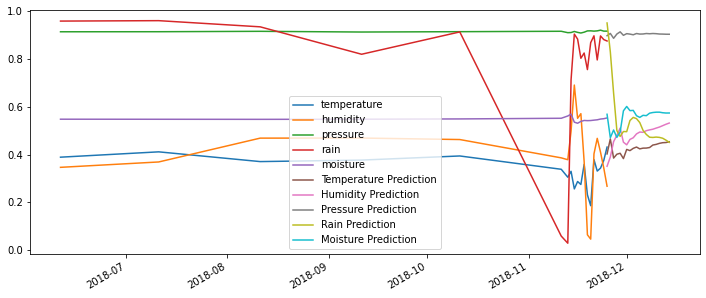

In [48]:
test_vs_pred.plot(figsize=(12,5))

<AxesSubplot:>

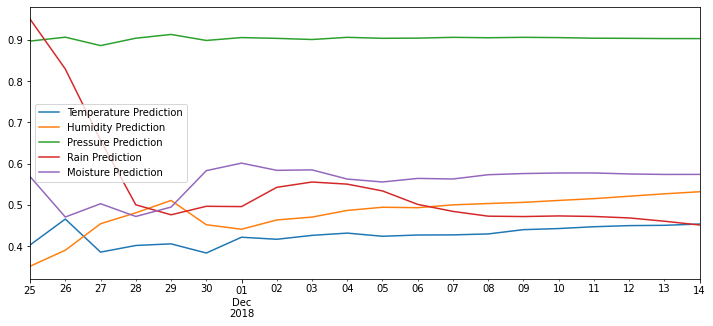

In [60]:
predictions.plot(figsize=(12,5))

In [61]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['Temperature Prediction'],test_df['temperature']))
print('Mean value of Temperature is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['temperature']),rmse_ulc))

rmse_hum=math.sqrt(mean_squared_error(predictions['Humidity Prediction'],test_df['humidity']))
print('Mean value of Humidity is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['humidity']),rmse_hum))

rmse_pre=math.sqrt(mean_squared_error(predictions['Pressure Prediction'],test_df['pressure']))
print('Mean value of Pressure is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['pressure']),rmse_pre))

rmse_rain=math.sqrt(mean_squared_error(predictions['Rain Prediction'],test_df['rain']))
print('Mean value of Rain is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rain']),rmse_rain))

rmse_moist=math.sqrt(mean_squared_error(predictions['Moisture Prediction'],test_df['moisture']))
print('Mean value of Moisture is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['moisture']),rmse_moist))

Mean value of Temperature is : 0.34055206078786265. Root Mean Squared Error is :0.11027501163053992
Mean value of Humidity is : 0.39129290599534344. Root Mean Squared Error is :0.18041122783609193
Mean value of Pressure is : 0.9144981243319045. Root Mean Squared Error is :0.012341959608302915
Mean value of Rain is : 0.763976577713173. Root Mean Squared Error is :0.3450629647227021
Mean value of Moisture is : 0.54782275. Root Mean Squared Error is :0.038157810021457704
